In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'X train samples')
print(X_test.shape[0], ' X test samples')

print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'y train samples')
print(y_test.shape[0], 'y test samples')


X_train shape: (50000, 32, 32, 3)
50000 X train samples
10000  X test samples
y_train shape: (50000, 1)
50000 y train samples
10000 y test samples


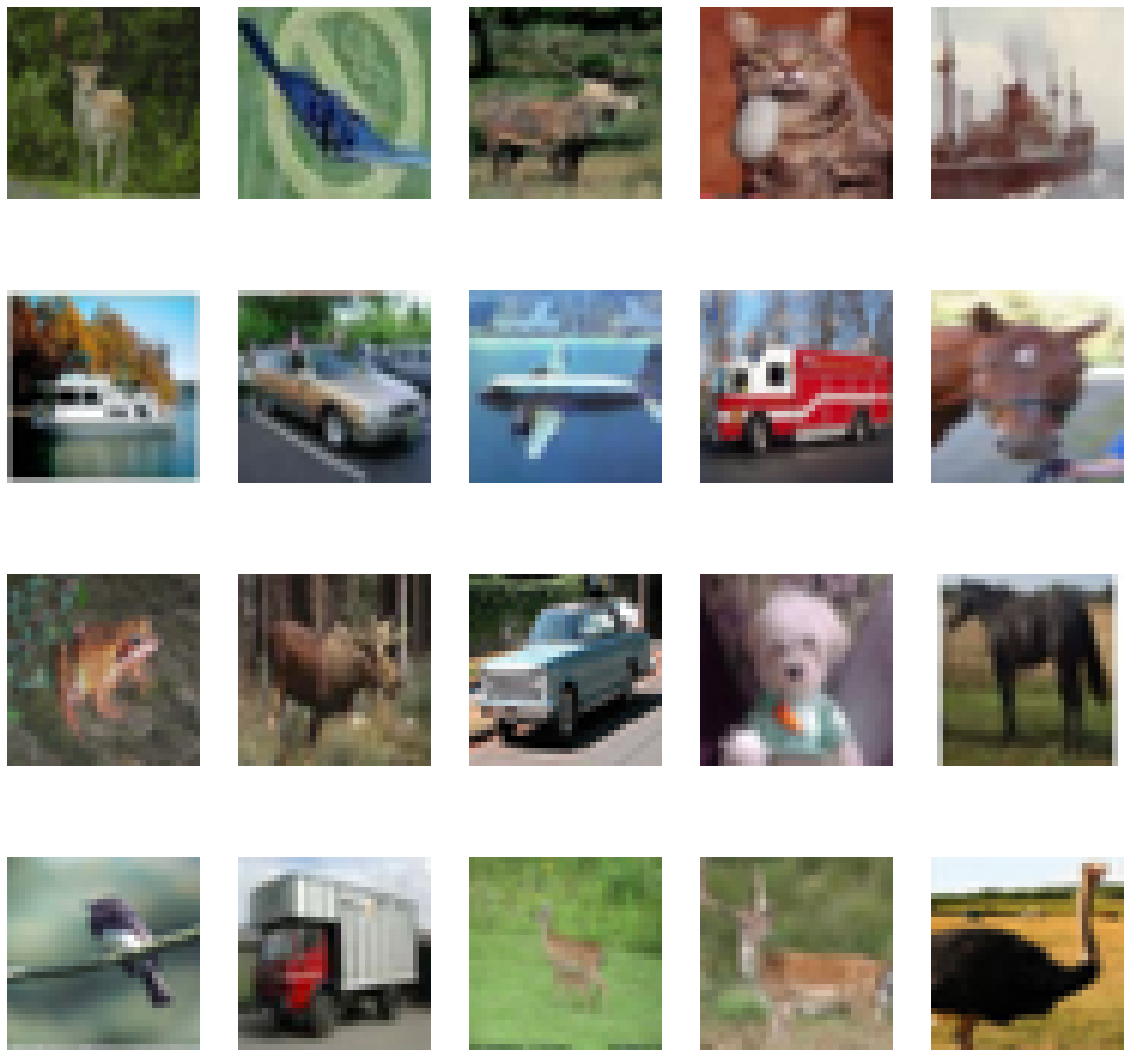

In [4]:
# show image
fig, axes1 = plt.subplots(4,5,figsize=(20,20))
for j in range(4):
    for k in range(5):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [5]:

# Normalization of pixel values 

X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.


In [6]:
y_train.shape

(45000, 1)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                kernel_initializer="he_normal" ))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_84 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_85 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_86 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_87 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_88 (Dense)             (None, 100)              

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid),callbacks=[ early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 14s 318us/sample - loss: 2.0876 - accuracy: 0.2231 - val_loss: 2.0132 - val_accuracy: 0.2492
Epoch 2/25
45000/45000 [==============================] - 12s 267us/sample - loss: 1.8993 - accuracy: 0.3022 - val_loss: 1.8847 - val_accuracy: 0.3076
Epoch 3/25
45000/45000 [==============================] - 12s 275us/sample - loss: 1.8478 - accuracy: 0.3274 - val_loss: 1.8147 - val_accuracy: 0.3378
Epoch 4/25
45000/45000 [==============================] - 13s 291us/sample - loss: 1.8022 - accuracy: 0.3452 - val_loss: 1.7345 - val_accuracy: 0.3742
Epoch 5/25
45000/45000 [==============================] - 13s 285us/sample - loss: 1.7720 - accuracy: 0.3642 - val_loss: 1.8913 - val_accuracy: 0.3156
Epoch 6/25
45000/45000 [==============================] - 13s 286us/sample - loss: 1.7870 - accuracy: 0.3540 - val_loss: 1.7595 - val_accuracy: 0.3614
Epoch 7/25
45000/45000 [=====================

In [35]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.6441931621551513, 0.4287]

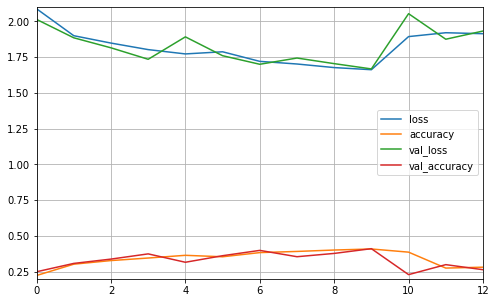

In [36]:
# Learning Curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 2.1)
plt.show()

In [23]:
# try  Batch Normalization 

batch_model = keras.models.Sequential()
batch_model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
for layer in range(20):
    batch_model.add(keras.layers.BatchNormalization())
    batch_model.add(keras.layers.Dense(100, activation="elu",
                                kernel_initializer="he_normal" ))
batch_model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
batch_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 3072)              12288     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               307300    
_________________________________________________________________
batch_normalization_21 (Batc (None, 100)               400       
_________________________________________________________________
dense_63 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)               400       
_________________________________________________________________
dense_64 (Dense)             (None, 100)              

In [26]:
batch_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [27]:
batch_history = batch_model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid),callbacks=[ early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 36s 791us/sample - loss: 1.9346 - accuracy: 0.3090 - val_loss: 1.7368 - val_accuracy: 0.3726
Epoch 2/25
45000/45000 [==============================] - 30s 676us/sample - loss: 1.7292 - accuracy: 0.3835 - val_loss: 1.6108 - val_accuracy: 0.4220
Epoch 3/25
45000/45000 [==============================] - 32s 711us/sample - loss: 1.6540 - accuracy: 0.4126 - val_loss: 1.5975 - val_accuracy: 0.4400
Epoch 4/25
45000/45000 [==============================] - 33s 727us/sample - loss: 1.6037 - accuracy: 0.4306 - val_loss: 1.5040 - val_accuracy: 0.4706
Epoch 5/25
45000/45000 [==============================] - 33s 734us/sample - loss: 1.5590 - accuracy: 0.4488 - val_loss: 1.4874 - val_accuracy: 0.4696
Epoch 6/25
45000/45000 [==============================] - 31s 693us/sample - loss: 1.5239 - accuracy: 0.4627 - val_loss: 1.4603 - val_accuracy: 0.4844
Epoch 7/25
45000/45000 [=====================

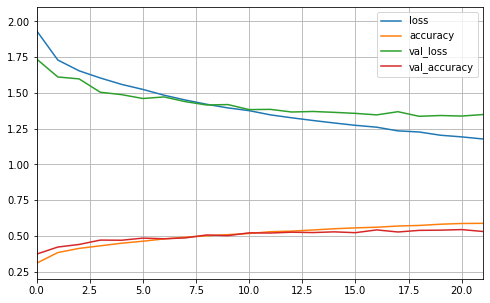

In [28]:
# Learning Curve
pd.DataFrame(batch_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 2.1)
plt.show()   # better than just sequential dense layers. Higher accuracy but slower speed of convergence

In [30]:
batch_model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3321589681625365, 0.5336]

In [37]:
## Try selu

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [38]:
selu_model = keras.models.Sequential()
selu_model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
for layer in range(20):
    selu_model.add(keras.layers.Dense(100, activation="selu",
                                kernel_initializer="lecun_normal" ))
selu_model.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
selu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [40]:
selu_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_105 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_106 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_107 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_108 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_109 (Dense)            (None, 100)              

In [47]:
selu_history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid),callbacks=[ early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 12s 277us/sample - loss: 1.2669 - accuracy: 0.5508 - val_loss: 1.4861 - val_accuracy: 0.4894
Epoch 2/25
45000/45000 [==============================] - 14s 318us/sample - loss: 1.2398 - accuracy: 0.5622 - val_loss: 1.4558 - val_accuracy: 0.4948
Epoch 3/25
45000/45000 [==============================] - 14s 317us/sample - loss: 1.2292 - accuracy: 0.5650 - val_loss: 1.4788 - val_accuracy: 0.4938
Epoch 4/25
45000/45000 [==============================] - 14s 318us/sample - loss: 1.2211 - accuracy: 0.5667 - val_loss: 1.4819 - val_accuracy: 0.4862
Epoch 5/25
45000/45000 [==============================] - 14s 304us/sample - loss: 1.2165 - accuracy: 0.5698 - val_loss: 1.4968 - val_accuracy: 0.4906


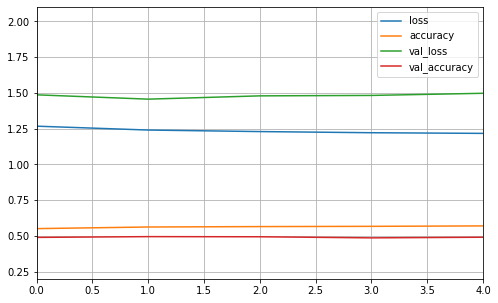

In [48]:
# Learning Curve
pd.DataFrame(selu_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 2.1)
plt.show()

In [51]:
selu_model.evaluate(X_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.3307767356872557, 0.0946]